In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [2]:
Model_PKL_MODEL = joblib.load('./PKL_Models/BinaryClass_model/BinaryClassModel 23 Features.pkl')

- ### Importing the Binary models using Joblib files 
    - ** Note : these models were trained on the Amazon Sagemaker

### Importing the unseen dataset on which we need to perform the prediction 

In [3]:
dfe = pd.read_csv("./Files/Unseen_data_20.csv")

# Only Orange Records of DE

In [48]:
dfoo = pd.read_csv("./Files/Only_Orange/onlyOrangeRecords.csv")

In [79]:
rdf1 = pd.read_csv("./Files/Only_Orange/Sheet1.csv")
rdf2 = pd.read_csv("./Files/Only_Orange/Sheet2.csv")
rdf3 = pd.read_csv("./Files/Only_Orange/Sheet3.csv")
dffd = pd.concat([rdf1,rdf2,rdf3])

In [80]:
dffd.shape

(1039482, 4)

In [85]:
dfoo = dfoo.merge(dffd,on="Id")

In [86]:
dfoo['StageName'].value_counts()

StageName
0    5840
1    5778
Name: count, dtype: int64

In [87]:
len(dft['Id'].unique())

11618

In [88]:
len(dfoo['Id'].unique())

11618

In [91]:
X_o = dfoo.drop(['StageName','Id', 'ContactId', 'AccountId', 'DP_Dishonours_Across_Primary_Acct_244__c',"Summary_Income_BS__c","DP_No_Direct_Debits_On_Primary_Acct_355__c", 'City',  'State',  'Country', 'Amount', 'Summary_Income_CV__c', 'loan_dishonours__c', 'Bank_Report_Gov_Benefit__c', 'Loan_apply_date', 'DE_Results', 'DP_Avg_Monthly_Loan_Liability_269__c', 'Opp_Number__c',"LoansGranted","LoansPaid","Purpose_of_Loan__c"], axis=1)
y_o = dfoo['StageName'].values

In [96]:
X_o = X_o[['Applicant_Type__c', 'Deposit_spent_on_DOD__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Payment_Frequency__c',
       'Amount_Requested__c', 'Dishonours_203__c',
       'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c',
       'Salary_Gov_Allowances_all_types_2117__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'DP_Total_Monthly_Benefit_Income__c', 'Total_monthly_credits__c',
       'dishonoursFound_Created']]

In [97]:
dfoo["Predicted"] = Model_PKL_MODEL.predict(X_o)

In [102]:
dfoo['Predicted'].value_counts()

Predicted
0    10001
1     1617
Name: count, dtype: int64

In [103]:
ac = accuracy_score(dfoo["StageName"],dfoo["Predicted"])
print('Accuracy is: ',ac)
# Accuracy is:  0.7082599065526328

Accuracy is:  0.42081253227750043


In [106]:
sum(dfoo['Amount'])

19186000

In [ ]:
# Evaluation

In [104]:
# ('Gains of Flynx', 18559850) with out any probablity
"Gains of Flynx",sum(dfoo[(dfoo['Predicted']==0) & (dfoo['StageName']==0)]['Amount'])

('Gains of Flynx', 8894200)

In [105]:
"Loss of Flynx",sum(dfoo[(dfoo['Predicted']==0) & (dfoo['StageName']==1)]['Amount'])

('Loss of Flynx', 7451800)

In [4]:
dfe.columns

Index(['Id', 'AccountId', 'City', 'State', 'Country', 'Applicant_Type__c',
       'Deposit_spent_on_DOD__c', 'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Amount',
       'Payment_Frequency__c', 'Summary_Income_CV__c', 'Amount_Requested__c',
       'Dishonours_203__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c',
       'Salary_Gov_Allowances_all_types_2117__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'DP_Avg_Monthly_Loan_Liability_269__c', 'Opp_Number__c',
       'loan_dishonours__c',

In [46]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Id                                          21645 non-null  object 
 1   AccountId                                   21645 non-null  object 
 2   City                                        21645 non-null  object 
 3   State                                       21645 non-null  object 
 4   Country                                     21645 non-null  object 
 5   Applicant_Type__c                           21645 non-null  int64  
 6   Deposit_spent_on_DOD__c                     21645 non-null  float64
 7   Monthly_ongoing_financial_commitments__c    21645 non-null  float64
 8   DP_Primary_income_frequency__c              21645 non-null  float64
 9   DP_enders_with_uncleared_dishonours_233__c  21645 non-null  float64
 10  Largest_in

In [10]:
dfe.columns

Index(['Id', 'AccountId', 'City', 'State', 'Country', 'Applicant_Type__c',
       'Deposit_spent_on_DOD__c', 'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Amount',
       'Payment_Frequency__c', 'Summary_Income_CV__c', 'Amount_Requested__c',
       'Dishonours_203__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c',
       'Salary_Gov_Allowances_all_types_2117__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'DP_Avg_Monthly_Loan_Liability_269__c', 'Opp_Number__c',
       'loan_dishonours__c',

In [47]:
dfe['Bank_Report_Gov_Benefit__c']

0        False
1        False
2        False
3        False
4        False
         ...  
21640    False
21641    False
21642    False
21643    False
21644     True
Name: Bank_Report_Gov_Benefit__c, Length: 21645, dtype: bool

In [11]:
dfe.shape

(21645, 39)

#### Checking the stagename count for each stage like Green, Orange, Red

In [7]:
dfe['StageName'].value_counts()

StageName
1    10836
0    10809
Name: count, dtype: int64

In [8]:
dfe['DE_Results'].value_counts()

DE_Results
0    11337
1    10308
Name: count, dtype: int64

#### Removing the unnecessaly columns Actually these features were not used at the time of training of Model.

In [14]:
X = dfe.drop(['StageName','Id', 'AccountId',  'City',  'State',  'Country', 'Amount', 'Summary_Income_BS__c', 'Summary_Income_CV__c', 'loan_dishonours__c', 'CloseDate', 'Bank_Report_Gov_Benefit__c', 'Loan_apply_date', 'DE_Results', 'DP_Avg_Monthly_Loan_Liability_269__c', 'Opp_Number__c'], axis=1)
y = dfe['StageName'].values

In [15]:
dfe["Predicted"] = Model_PKL_MODEL.predict(X)

In [16]:
ac = accuracy_score(dfe["StageName"],dfe["Predicted"])
print('Accuracy is: ',ac)
# Accuracy is:  0.7082599065526328

Accuracy is:  0.9259413259413259


In [17]:
"Accurracy of DE is", accuracy_score(dfe["StageName"],dfe['DE_Results'])

('Accurracy of DE is', 0.9751443751443751)

In [34]:
X['Predicted'] =  Model_PKL_MODEL.predict(X)

<Axes: >

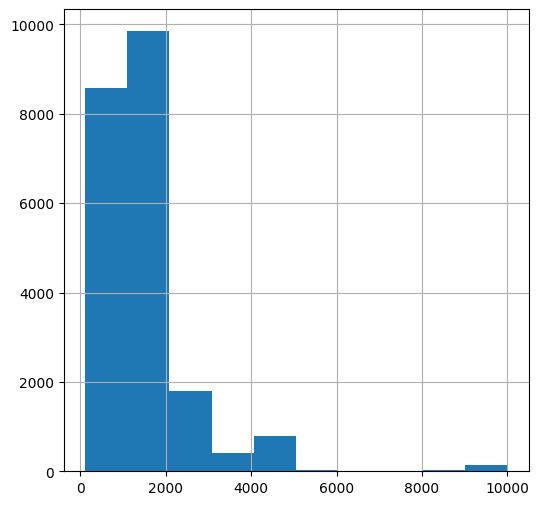

In [19]:
dfe['Amount'].hist(figsize=[6,6])

In [20]:
dfe.shape

(21645, 40)

## now Calculating the prediction probability of the Binary Model for the predicted Class

In [44]:
def obtain_binary_probability_Score_Green(row):
    reshaped_value = row.to_frame().transpose()
    print(reshaped_value)
    preidcteValue =  reshaped_value['Predicted'].values[0]
    reshaped_value.drop(['Predicted'],inplace=True, axis=1)
    predicted_probal_green = Model_PKL_MODEL.predict_proba(reshaped_value)
    # print("preidcteValue :> ",preidcteValue)
    # print(predicted_probal_green)
    return predicted_probal_green[:, preidcteValue][0]


# def obtain_binary_probability_Score_Orange(row):
#     reshaped_value = row.to_frame().transpose()
#     predicted_result_orange =  Binary_PKL_MODEL_ORANGE.predict(reshaped_value)
#     predicted_probal_orange = Binary_PKL_MODEL_ORANGE.predict_proba(reshaped_value)
#     result_o = predicted_result_orange[0] 
#     return predicted_probal_orange[:, result_o][0]

# def obtain_binary_probability_Score_Red(row):
#     reshaped_value = row.to_frame().transpose()
#     predicted_result_red =  Binary_PKL_MODEL_RED.predict(reshaped_value)
#     predicted_probal_red = Binary_PKL_MODEL_RED.predict_proba(reshaped_value)
#     result_r = predicted_result_red[0] 
#     return predicted_probal_red[:, result_r][0]

In [156]:
dfe["prediction_probability"] = X[:10].apply(obtain_binary_probability_Score_Green,axis=1)    

In [143]:
check = solo.apply(obtain_binary_probability_Score_Green,axis=1)    

preidcteValue :>  0
[[0.52 0.48]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.58 0.42]]
preidcteValue :>  0
[[0.94 0.06]]
preidcteValue :>  0
[[0.71 0.29]]
preidcteValue :>  0
[[0.7 0.3]]
preidcteValue :>  0
[[0.53 0.47]]
preidcteValue :>  0
[[0.84 0.16]]
preidcteValue :>  0
[[0.69 0.31]]
preidcteValue :>  0
[[0.68 0.32]]
preidcteValue :>  0
[[0.53 0.47]]
preidcteValue :>  0
[[0.63 0.37]]
preidcteValue :>  0
[[0.51 0.49]]
preidcteValue :>  0
[[0.79 0.21]]
preidcteValue :>  0
[[0.89 0.11]]
preidcteValue :>  0
[[0.66 0.34]]
preidcteValue :>  0
[[0.71 0.29]]
preidcteValue :>  0
[[0.69 0.31]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.56 0.44]]
preidcteValue :>  0
[[0.8 0.2]]
preidcteValue :>  0
[[0.59 0.41]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.98500351 0.01499649]]
preidcteValue :>  0
[[0.52 0.48]]
preidcteValue :>  0
[[0.88 0.12]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.89 0.11]]
preidcteValue :>  0
[[0.67 0.33]]
preidc

In [132]:
sahi_sahi = dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]

In [151]:
checl = sahi_sahi[sahi_sahi['Amount']<=2000].apply(obtain_binary_probability_Score_Green,axis=1)   

preidcteValue :>  0
[[0.7 0.3]]
preidcteValue :>  0
[[0.94 0.06]]
preidcteValue :>  0
[[0.9 0.1]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.99 0.01]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.83 0.17]]
preidcteValue :>  0
[[0.93 0.07]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.65 0.35]]
preidcteValue :>  0
[[0.77 0.23]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.58 0.42]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.74 0.26]]
preidcteValue :>  0
[[0.78 0.22]]
preidcteValue :>  0
[[0.95 0.05]]
preidcteValue :>  0
[[0.96 0.04]]
preidcteValue :>  0
[[0.8 0.2]]
preidcteValue :>  0
[[0.57 0.43]]
preidcteValue :>  0
[[0.91 0.09]]
preidcteValue :>  0
[[0.96 0.04]]
preidcteValue :>  0
[[0.66 0.34]]
preidcteValue :>  0
[[0.85 0.15]]
preidcteValue :>  0
[[0.68 0.32]]
preidcteValue :>  0


In [153]:
count = 0
for i in checl:
    if i < 0.60:
        count+=1

count

460

In [155]:
len(checl)

5537

In [ ]:
Galat = 410/2048
Shi kitna galat hue = 578/11825

In [149]:
578/11825

0.04887949260042283

In [150]:
460/  #410/2048 

0.2001953125

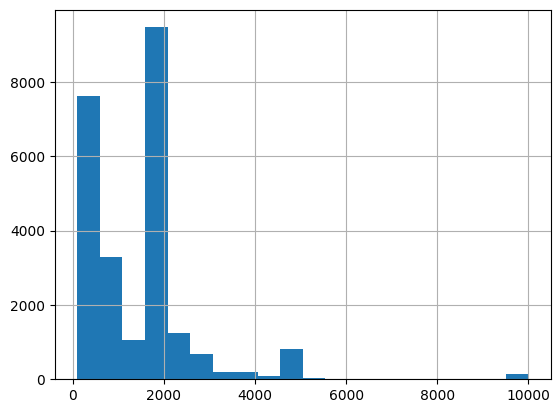

In [108]:
names = dfe['Amount']
values = dfe['Amount']

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# # the histogram of the data
plt.hist(dfe['Amount'], bins=20)
plt.grid(True)
plt.show()

### Eveluating the results of model to Calculate the Gains and Loss of Our Model

In [22]:
import matplotlib.pyplot as plt


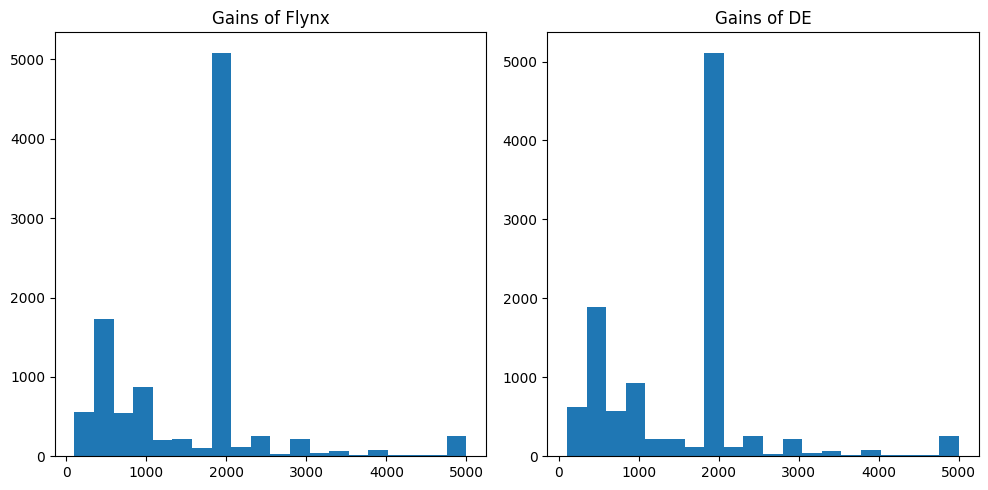

In [25]:
# Create subplots
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.hist(dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]['Amount'], bins=20)
plt.title('Gains of Flynx')

# Second pie chart
plt.subplot(1, 2, 2)
plt.hist(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==0)]['Amount'], bins=20)
plt.title('Gains of DE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

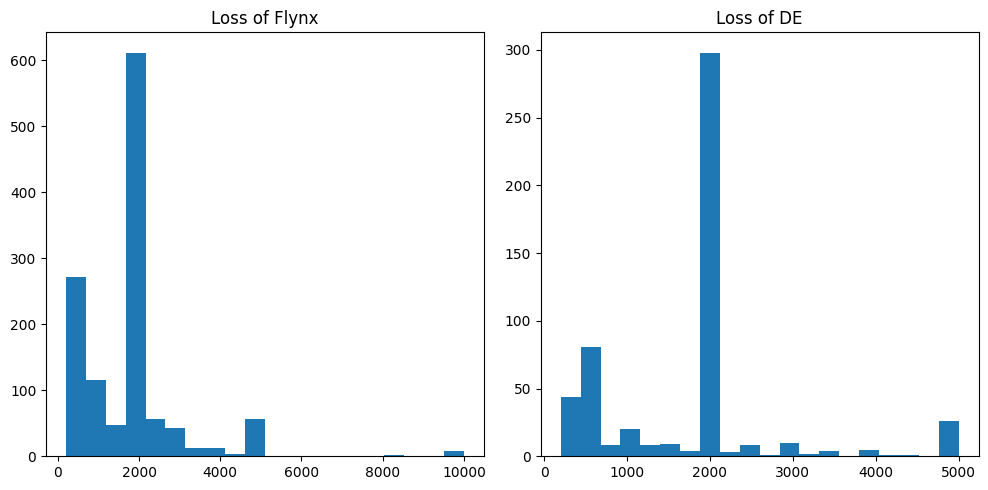

In [27]:
# Create subplots
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.hist(dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)]['Amount'], bins=20)
plt.title('Loss of Flynx')

# Second pie chart
plt.subplot(1, 2, 2)
plt.hist(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1)]['Amount'], bins=20)
plt.title('Loss of DE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [107]:
dfe[(dfe['Predicted']==0) & (dfe['StageName']==0) & (dfe['Amount']==2000)]

,Id,AccountId,City,State,Country,Applicant_Type__c,Deposit_spent_on_DOD__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,DP_enders_with_uncleared_dishonours_233__c,...,CloseDate,Bank_Report_Gov_Benefit__c,Loan_apply_date,DE_Results,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,dishonoursFound_Created,StageName,Predicted
114,0062x00000Da8pYAAR,0012x00000cmQH7AAM,Moorak,SA,Australia,0,41.11,1149.3545,2.0,0.0,...,25-04-2023,False,2023-04-25,0,0.0,3705.0,3449.62,0.00,0,0
191,0062x00000DYkKcAAL,0010K000028i0aMQAQ,Kuraby,QLD,Australia,0,87.76,463.4891,1.0,0.0,...,13-04-2023,False,2023-04-12,0,0.0,5520.0,5247.46,0.00,0,0
238,0062x00000D92aEAAR,0012800001SDTCFAA5,Bellbowrie,QLD,Australia,0,41.27,1573.6042,2.0,0.0,...,27-01-2023,False,2023-01-27,0,342.0,7570.0,4005.49,0.28,0,0
270,0062x00000DArweAAD,0010K00001qmbcTQAQ,Matraville,NSW,Australia,0,22.81,1583.5633,2.0,0.0,...,09-02-2023,False,2023-02-09,0,0.0,8491.0,7946.31,0.00,0,0
287,0062x00000DAxE3AAL,0012x00000ACdjbAAD,Warners Bay,NSW,Australia,0,97.73,494.7405,4.0,0.0,...,10-02-2023,False,2023-02-09,0,2659.0,5724.0,2687.01,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,0062x00000DHDrBAAX,0012x00000KMmg0AAD,Port Macquarie,NSW,Australia,0,66.42,1524.5027,1.0,2.0,...,28-02-2023,False,2023-02-27,0,0.0,5832.0,5216.43,0.10,0,0
10431,0062x00000D7Lf9AAF,0012x00000WpjwcAAB,Fitzroy Crossing,WA,Australia,0,89.75,1757.0922,4.0,1.0,...,15-01-2023,False,2023-01-14,0,0.0,7337.0,6760.46,0.30,0,0
10542,0062x00000DGie8AAD,0012x00000WrxfnAAB,Armidale,NSW,Australia,0,43.69,784.6129,2.0,0.0,...,23-02-2023,False,2023-02-22,0,0.0,6350.0,6685.74,0.00,0,0
10568,0062x00000DAYTFAA5,0012x00000INVQsAAP,Chidlow,WA,Australia,0,98.20,754.6144,2.0,0.0,...,07-02-2023,False,2023-02-07,0,0.0,4148.0,3846.46,0.21,0,0


In [108]:
dfe[(dfe['Predicted']==0) & (dfe['StageName']==1) & (dfe['Amount']==2000)]

,Id,AccountId,City,State,Country,Applicant_Type__c,Deposit_spent_on_DOD__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,DP_enders_with_uncleared_dishonours_233__c,...,CloseDate,Bank_Report_Gov_Benefit__c,Loan_apply_date,DE_Results,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,dishonoursFound_Created,StageName,Predicted
11017,0062x00000EwRrHAAV,0010K00001wE7JWQA0,Kingaroy,QLD,Australia,0,39.64,1847.8125,4.0,1.0,...,20-09-2023,False,2023-09-20,1,0.0,17411.0,11550.49,0.14,1,0
11047,0062x00000DWDovAAH,0012x00000g9VZaAAM,Altona Meadows,VIC,Australia,0,56.34,5231.3798,1.0,0.0,...,21-03-2023,False,2023-03-20,0,0.0,13670.0,12129.28,0.03,1,0
11587,0062x00000Fgw0nAAB,0012x00000nPxWmAAK,Keperra,QLD,Australia,1,65.45,1353.3013,1.0,0.0,...,2024-01-14,False,2024-01-14,1,0.0,4581.0,4599.78,0.30,1,0
11630,0062x00000DFtALAA1,0010K000029H0J6QAK,Gracemere,QLD,Australia,0,59.44,1656.5858,1.0,0.0,...,18-02-2023,False,2023-02-15,0,0.0,4319.0,4298.35,0.00,1,0
11716,0062x00000DWkybAAD,0012x00000RrfiJAAR,Davistown,NSW,Australia,0,70.48,3381.2376,4.0,0.0,...,26-03-2023,False,2023-03-25,1,0.0,8938.0,4016.36,0.10,1,0
12034,0062x00000DHJHWAA5,0012x00000FGbCtAAL,ARMADALE,WA,Australia,0,59.46,0.0000,2.0,0.0,...,28-02-2023,False,2023-02-28,1,2877.0,5445.0,5556.58,0.04,1,0
13025,0062x00000DZy5OAAT,0012x00000MjKuIAAV,Rochedale South,QLD,Australia,0,70.51,3192.2800,1.0,0.0,...,24-04-2023,False,2023-04-24,0,0.0,14748.0,9747.24,0.00,1,0
13453,0062x00000E7bKCAAZ,0012x00000hZrsKAAS,Wulguru,QLD,Australia,1,22.23,265.8566,2.0,0.0,...,05-07-2023,False,2023-07-05,1,31.0,1772.0,1575.22,0.00,1,0
14973,0062x00000Ey7VpAAJ,0012x00000XQAWnAAP,Rowville,VIC,Australia,0,88.23,2414.7300,4.0,0.0,...,02-10-2023,False,2023-10-02,1,0.0,11437.0,10961.66,0.35,1,0
15193,0062x00000DZplRAAT,0012x00000IPaE3AAL,Berwick,VIC,Australia,0,31.87,2647.5010,1.0,0.0,...,22-04-2023,False,2023-04-22,0,74.0,9392.0,9149.33,0.00,1,0


In [109]:
dfe[(dfe['DE_Results']==0) & (dfe['StageName']==0) & (dfe['Amount']==2000)]

,Id,AccountId,City,State,Country,Applicant_Type__c,Deposit_spent_on_DOD__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,DP_enders_with_uncleared_dishonours_233__c,...,CloseDate,Bank_Report_Gov_Benefit__c,Loan_apply_date,DE_Results,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,dishonoursFound_Created,StageName,Predicted
114,0062x00000Da8pYAAR,0012x00000cmQH7AAM,Moorak,SA,Australia,0,41.11,1149.3545,2.0,0.0,...,25-04-2023,False,2023-04-25,0,0.0,3705.0,3449.62,0.00,0,0
191,0062x00000DYkKcAAL,0010K000028i0aMQAQ,Kuraby,QLD,Australia,0,87.76,463.4891,1.0,0.0,...,13-04-2023,False,2023-04-12,0,0.0,5520.0,5247.46,0.00,0,0
238,0062x00000D92aEAAR,0012800001SDTCFAA5,Bellbowrie,QLD,Australia,0,41.27,1573.6042,2.0,0.0,...,27-01-2023,False,2023-01-27,0,342.0,7570.0,4005.49,0.28,0,0
270,0062x00000DArweAAD,0010K00001qmbcTQAQ,Matraville,NSW,Australia,0,22.81,1583.5633,2.0,0.0,...,09-02-2023,False,2023-02-09,0,0.0,8491.0,7946.31,0.00,0,0
287,0062x00000DAxE3AAL,0012x00000ACdjbAAD,Warners Bay,NSW,Australia,0,97.73,494.7405,4.0,0.0,...,10-02-2023,False,2023-02-09,0,2659.0,5724.0,2687.01,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,0062x00000D7Lf9AAF,0012x00000WpjwcAAB,Fitzroy Crossing,WA,Australia,0,89.75,1757.0922,4.0,1.0,...,15-01-2023,False,2023-01-14,0,0.0,7337.0,6760.46,0.30,0,0
10542,0062x00000DGie8AAD,0012x00000WrxfnAAB,Armidale,NSW,Australia,0,43.69,784.6129,2.0,0.0,...,23-02-2023,False,2023-02-22,0,0.0,6350.0,6685.74,0.00,0,0
10568,0062x00000DAYTFAA5,0012x00000INVQsAAP,Chidlow,WA,Australia,0,98.20,754.6144,2.0,0.0,...,07-02-2023,False,2023-02-07,0,0.0,4148.0,3846.46,0.21,0,0
10587,0062x00000D9rtrAAB,0010K00001xPQheQAG,HOMEBUSH WEST,NSW,Australia,0,29.16,0.0000,0.0,0.0,...,03-02-2023,False,2023-02-03,0,0.0,3335.0,4015.71,0.00,0,1


In [110]:
dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1) & (dfe['Amount']==2000)]

,Id,AccountId,City,State,Country,Applicant_Type__c,Deposit_spent_on_DOD__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,DP_enders_with_uncleared_dishonours_233__c,...,CloseDate,Bank_Report_Gov_Benefit__c,Loan_apply_date,DE_Results,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,dishonoursFound_Created,StageName,Predicted
11047,0062x00000DWDovAAH,0012x00000g9VZaAAM,Altona Meadows,VIC,Australia,0,56.34,5231.3798,1.0,0.0,...,21-03-2023,False,2023-03-20,0,0.0,13670.0,12129.28,0.03,1,0
11630,0062x00000DFtALAA1,0010K000029H0J6QAK,Gracemere,QLD,Australia,0,59.44,1656.5858,1.0,0.0,...,18-02-2023,False,2023-02-15,0,0.0,4319.0,4298.35,0.00,1,0
13025,0062x00000DZy5OAAT,0012x00000MjKuIAAV,Rochedale South,QLD,Australia,0,70.51,3192.2800,1.0,0.0,...,24-04-2023,False,2023-04-24,0,0.0,14748.0,9747.24,0.00,1,0
15193,0062x00000DZplRAAT,0012x00000IPaE3AAL,Berwick,VIC,Australia,0,31.87,2647.5010,1.0,0.0,...,22-04-2023,False,2023-04-22,0,74.0,9392.0,9149.33,0.00,1,0
17121,0062x00000DGjSVAA1,0012x00000BHKm9AAH,Pakenham,VIC,Australia,0,97.60,98.2884,1.0,0.0,...,26-02-2023,False,2023-02-22,0,0.0,2809.0,2798.00,0.36,1,0
18222,0062x00000DrAQxAAN,0012x00000THAOvAAP,South MacLean,QLD,Australia,0,73.61,3460.2411,1.0,0.0,...,27-04-2023,False,2023-04-27,0,0.0,8622.0,7945.79,0.01,1,0
18441,0062x00000DZ6hlAAD,0010K00001sEjeLQAS,Queanbeyan,NSW,Australia,0,81.80,1612.7088,2.0,0.0,...,20-04-2023,False,2023-04-16,0,105.0,9099.0,8209.78,0.31,1,0
18633,0062x00000DZUz8AAH,0010K000025xirrQAA,Teneriffe,QLD,Australia,0,74.30,3503.2437,2.0,0.0,...,19-04-2023,False,2023-04-19,0,0.0,8038.0,7480.43,0.00,1,0
18719,0062x00000DZV2CAAX,0010K00001fdmv3QAA,Mackay,QLD,Australia,0,45.17,315.4600,2.0,0.0,...,19-04-2023,False,2023-04-19,0,0.0,6496.0,5621.41,0.00,1,0
19138,0062x00000DI428AAD,0010K0000241AhUQAU,WANDIN NORTH,VIC,Australia,0,85.81,481.2896,2.0,2.0,...,07-03-2023,False,2023-03-07,0,1293.0,5522.0,5351.61,0.47,1,0


In [28]:
# ('Gains of Flynx', 18559850) with out any probablity
"Gains of Flynx",sum(dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]['Amount'])

('Gains of Flynx', 17179950)

In [29]:
"Gains of DE",sum(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==0)]['Amount'])

('Gains of DE', 17431400)

In [32]:
# ('Losses of Flynx', 3124350) With any probablity
"Losses of Flynx",sum(dfe[(dfe['Predicted']==0) & (dfe['StageName']==1) & (dfe['Amount']<=5000)]['Amount'])

('Losses of Flynx', 2208600)

In [31]:
"Losses of DE",sum(dfe[(dfe['DE_Results']==0) & (dfe['StageName']==1)]['Amount'])

('Losses of DE', 960350)

In [207]:
tempDf= dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)]

In [208]:
tempDf.to_csv("./Files/Check/Wrong_Results.csv",index=False)

In [202]:
dfu = pd.read_csv("./Files/Check/DF_LoanDataSet_version_1.csv")

C:\Users\ritik\AppData\Local\Temp\ipykernel_27376\626495556.py:1: DtypeWarning: Columns (17,45,59) have mixed types. Specify dtype option on import or set low_memory=False.
  dfu = pd.read_csv("./Files/Check/DF_LoanDataSet_version_1.csv")


In [205]:
dhui.columns

Index(['Id', 'Decision_Engine_Repeat_Loans_Status__c',
       'Decision_Engine_V3_Status__c', 'Decline_Notification__c', 'CloseDate'],
      dtype='object')

In [204]:
dhui = dfu[['Id', 'Decision_Engine_Repeat_Loans_Status__c',
       'Decision_Engine_V3_Status__c', 'Decline_Notification__c', 'CloseDate',]]

In [209]:
solve = tempDf.merge(dhui,on="Id")

In [215]:
solve.to_csv("./Files/Check/WrongRealData.csv",index="False")

In [212]:
tech = dfe[(dfe['Predicted']==0) & (dfe['StageName']==0)]

In [213]:
solvetech = tech.merge(dhui,on="Id")

In [214]:
solvetech.to_csv("./Files/Check/SolveRealData.csv",index=False)

In [85]:
solo = dfe[(dfe['Predicted']==0) & (dfe['StageName']==1)]

In [118]:
sum(solo[solo['Amount']==2000]['Amount'])

102000

In [ ]:
70% Model
Gain FLynx -> 2,28,97,050
LOSS FLynx -> 28,46,600

Gain DE Engine -> 1,84,69,450
LOSS DE Engine -> 11,96,700

In [ ]:
75% Model
Gain FLynx -> 1,48,92,100 
Gain DE Engine -> 1,84,69,450

LOSS FLynx -> 16,76,600
LOSS DE Engine -> 11,96,700

In [ ]:
85% Model
Gain FLynx -> 49,05,750
Gain DE Engine -> 1,84,69,450

LOSS Flynx -> 4,62,100
LOSS DE Engine -> 11,96,700

In [34]:
dfe.columns

Index(['Id', 'DP_Total_Monthly_Benefit_Income__c', 'Total_monthly_credits__c',
       'Summary_Income_BS__c', 'AccountId', 'City', 'State', 'Country',
       'StageName', 'Applicant_Type__c', 'Deposit_spent_on_DOD__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c', 'Payment_Frequency__c',
       'Summary_Income_CV__c', 'Amount_Requested__c', 'Dishonours_203__c',
       'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_La

### Now Calculating the final Prediction from the combination of multiclass and Binary Results

In [89]:
def obtain_binary_result(row):
    reshaped_value = row.to_frame().transpose()
    predictedProbab = reshaped_value['predict_probability'].values[0]
    predictedValue = reshaped_value['Predicted'].values[0]
    if predictedValue != 0:
        return predictedValue
    DeltaThreshold,GlobalThreshold = 0.03,0.6
    
    bin_prob_0, bin_prob_1, bin_prob_2 = reshaped_value['Green_Binary_Probability'].values[0],reshaped_value['Orange_Binary_Probability'].values[0],reshaped_value['Red_Binary_Probability'].values[0]
    if predictedProbab>=GlobalThreshold:

        prob_diff_G_R,prob_diff_G_O = abs(bin_prob_0-bin_prob_2), abs(bin_prob_0-bin_prob_1)
        if prob_diff_G_R < prob_diff_G_O :
            if prob_diff_G_R < DeltaThreshold:
                return 2
            else:
                if bin_prob_2 >bin_prob_0:
                    return 2
                else:
                    return 0
        else:
            if prob_diff_G_O <  DeltaThreshold:
                return 1
            else:
                if bin_prob_1>bin_prob_0:
                    return 1
                else:
                    return 0
    else:
        if predictedProbab<GlobalThreshold:
            if bin_prob_1>bin_prob_2:
                return 1
            else:
                return 2

In [90]:
dfe['Final_predicted_variation'] = dfe.apply(obtain_binary_result,axis=1)

In [91]:
dfe['Final_predicted_variation'] = dfe['Final_predicted_variation'].astype(int)

In [92]:
dfe['Diff_Green_Red'] = dfe['Green_Binary_Probability'] - dfe['Red_Binary_Probability']

In [93]:
dfe['Diff_Green_Orange'] = dfe['Green_Binary_Probability'] - dfe['Orange_Binary_Probability']

In [94]:
dfe['Diff_Green_Red'] = abs(dfe['Diff_Green_Red'])

In [95]:
dfe['Diff_Green_Orange'] = abs(dfe['Diff_Green_Orange'])

<Axes: >

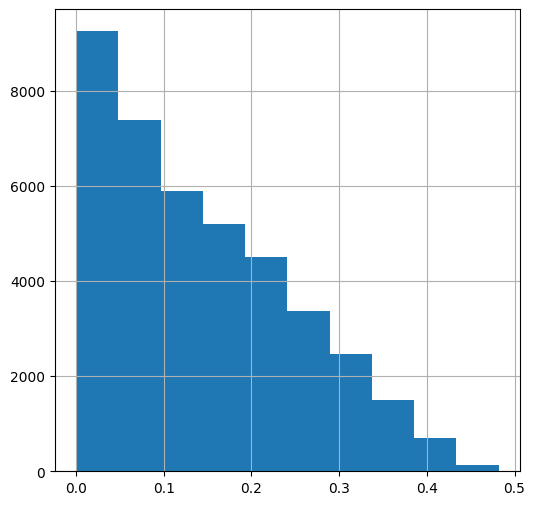

In [100]:
dfe[dfe['predict_probability'] >=0.7 ]['Diff_Green_Red'].hist(figsize=(6,6))

<Axes: >

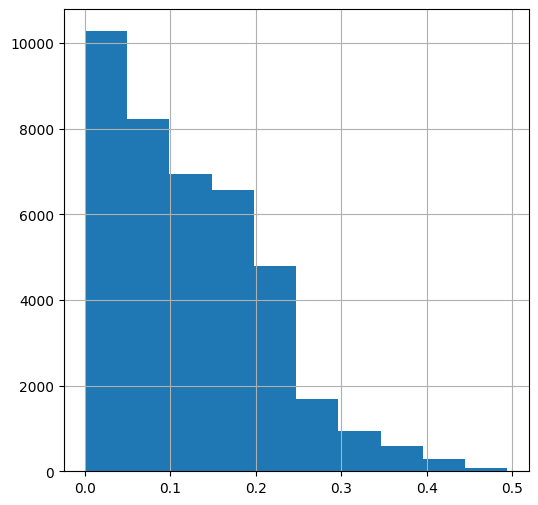

In [101]:
dfe[dfe['predict_probability'] >=0.7 ]['Diff_Green_Orange'].hist(figsize=(6,6))

In [41]:
dfe.head(10)

,Id,DP_Total_Monthly_Benefit_Income__c,Total_monthly_credits__c,Summary_Income_BS__c,AccountId,City,State,Country,StageName,Applicant_Type__c,...,DE_Results,Predicted,predict_probability,Green_Binary_Predicted,Orange_Binary_Predicted,Red_Binary_Predicted,Green_Binary_Probability,Orange_Binary_Probability,Red_Binary_Probability,Final_predicted
0,0062x00000E6wToAAJ,0.0,25283.0,19675.89,0012x00000hYJlKAAW,Banyo,QLD,Australia,0,0,...,1,1,0.735534,1,1,0,0.526245,0.735534,0.84,1
1,0062x00000E6wGlAAJ,13.0,7615.0,6989.35,0012x000005UPkQAAW,Rosebud,VIC,Australia,0,0,...,1,1,0.647493,0,1,0,0.643047,0.647493,0.80,1
2,0062x00000E6wKXAAZ,0.0,8516.0,7686.59,0012x00000fm2suAAA,HASSALL GROVE,NSW,Australia,0,0,...,1,0,0.453387,0,1,0,0.546613,0.622742,0.86,2
3,0062x00000E6wG1AAJ,0.0,5290.0,4798.16,0012x00000e0RWhAAM,WALGETT,NSW,Australia,0,0,...,0,1,0.666116,1,1,0,0.646044,0.666116,0.77,1
4,0062x00000E6vgnAAB,0.0,7138.0,7380.65,0012x00000RrG8HAAV,Piccadilly,WA,Australia,0,0,...,1,1,0.724416,1,1,0,0.608462,0.724416,0.85,1
5,0062x00000E6w82AAB,0.0,6538.0,6002.69,0012x000003EkGYAA0,Narellan Vale,NSW,Australia,0,0,...,0,1,0.609611,0,1,0,0.523741,0.609611,0.82,1
6,0062x00000E6w1fAAB,0.0,7539.0,7569.39,0012x00000IMXgtAAH,South Morang,VIC,Australia,0,0,...,0,1,0.534912,1,1,0,0.614043,0.534912,0.69,1
7,0062x00000E6vspAAB,786.0,6939.0,7256.96,0012x00000gmzqsAAA,Hampton Park,VIC,Australia,0,0,...,0,1,0.765536,1,1,0,0.506782,0.765536,0.85,1
8,0062x00000E6vxsAAB,0.0,4983.0,2036.85,0012x00000INaIVAA1,Thomastown,VIC,Australia,0,0,...,0,1,0.587239,1,1,0,0.567581,0.587239,0.74,1
9,0062x00000E6vraAAB,90.0,11599.0,10835.78,0012x00000gpYTbAAM,Reservoir,VIC,Australia,0,0,...,1,1,0.572262,1,1,0,0.504861,0.572262,0.60,1


In [77]:
acF = accuracy_score(dfe["StageName"],dfe["Final_predicted"])
print('Accuracy with final predicted is : ',acF)
# Accuracy is:  0.7082599065526328

Accuracy with final predicted is :  0.39457726017818606


In [33]:
dfe.columns

Index(['Id', 'City', 'State', 'Country', 'StageName', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Ren

In [34]:
X = dfe.drop(['Id', 'City', 'State', 'Country','StageName','Summary_Total__c', 'CloseDate', 'Loan_apply_date', 'DE_Results', 'Predicted', 'predict_probability', 'Final_predicted'],axis=1)

In [37]:
dfe.shape  

(77171, 52)

In [38]:
dfe.columns

Index(['Id', 'City', 'State', 'Country', 'StageName', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Ren

In [39]:
# Define the desired column order
desired_order = ['Id', 'City', 'State', 'Country', 'Applicant_Type__c',
       'income_as_a_of_DP200_income__c', 'Deposit_spent_on_DOD__c',
       'DP_Monthly_avg_of_SACC_repayments__c',
       'Monthly_ongoing_financial_commitments__c',
       'DP_Primary_income_frequency__c',
       'DP_enders_with_uncleared_dishonours_233__c',
       'Primary_regular_benefit_frequency__c',
       'Largest_income_source_day_of_week__c',
       'Frequency_for_largest_income_source__c',
       'Total_monthly_income_ongoin_Reg_231__c',
       'DP_Dishonours_Across_Primary_Acct_244__c',
       'DP_No_Direct_Debits_On_Primary_Acct_355__c',
       'Amount_of_SACC_commitments_due__c', 'Largest_income_Src_Avg_freq__c',
       'Largest_income_Src_last_payment_amt__c',
       'agency_collection_providers__c',
       'income_DP200_spend_on_high_risk_merch__c',
       'most_recent_loan_has_no_repayments__c',
       'Income_source_is_other_income_549__c', 'Summary_Income__c',
       'Summary_Expenses__c', 'Rent_Mortgage__c', 'Summary_Total__c',
       'Total_Repayment_Amount__c', 'Total_Repayments__c',
       'Term_in_Weeks__c', 'Payment_Frequency__c', 'Applicant_Age__c',
       'Summary_Income_CV__c', 'CloseDate', 'Amount_Requested__c',
       'Employment_Status__c', 'Dishonours_203__c',
       'DP_Insolvency_Indicator__c', 'DP_Days_in_Overdrawn_For_Period__c',
       'Dishonours_For_Last_30_Days_DP907__c','Green_Binary_Probability', 'Orange_Binary_Probability',
       'Red_Binary_Probability', 'Salary_Gov_Allowances_all_types_2117__c', 'Loan_apply_date',
       'Predicted',  'predict_probability',
        'DE_Results', 'StageName', 'Final_predicted', 'Loan_Amount__c']

# Reorder the columns
df = dfe.loc[:, desired_order]


In [40]:
df.head(20)

,Id,City,State,Country,Applicant_Type__c,income_as_a_of_DP200_income__c,Deposit_spent_on_DOD__c,DP_Monthly_avg_of_SACC_repayments__c,Monthly_ongoing_financial_commitments__c,DP_Primary_income_frequency__c,...,Orange_Binary_Probability,Red_Binary_Probability,Salary_Gov_Allowances_all_types_2117__c,Loan_apply_date,Predicted,predict_probability,DE_Results,StageName,Final_predicted,Loan_Amount__c
0,0062x00000GBxNYAA1,Rocky Point,QLD,Australia,0,0.00,65.08,384,1543.0844,1,...,0.596921,0.596921,3940.5066,2024-04-04,0,0.675411,0,0,2,400
1,0062x00000GBj14AAD,Springvale,VIC,Australia,0,0.00,94.34,327,127.7500,1,...,0.760778,0.760778,3681.9166,2024-04-03,0,0.689338,1,0,1,500
2,0062x00000GBa1uAAD,Seven Hills,NSW,Australia,0,0.00,99.59,0,0.0000,2,...,0.517170,0.517170,0.0000,2024-04-02,0,0.675912,0,0,2,1000
3,0062x00000GH0EWAA1,Andergrove,QLD,Australia,0,12.20,52.07,442,1975.7933,1,...,0.612081,0.612081,4873.8700,2024-04-01,0,0.661772,0,0,2,2050
4,0062x00000GGyhIAAT,Binnaway,NSW,Australia,0,0.00,43.79,2408,0.0000,4,...,0.728256,0.728256,0.0000,2024-04-01,0,0.071963,1,0,1,2050
5,0062x00000GGtSEAA1,Caringbah,NSW,Australia,0,0.00,61.20,1011,4289.4521,1,...,0.634213,0.634213,8102.0933,2024-03-31,0,0.265073,2,0,2,2250
6,0062x00000GGnU9AAL,Knoxfield,VIC,Australia,0,11.07,56.84,871,846.5899,1,...,0.741088,0.741088,5244.3766,2024-03-30,0,0.132309,0,0,1,3000
7,0062x00000GGkG9AAL,Seven Hills,NSW,Australia,0,0.00,99.38,0,0.0000,2,...,0.866726,0.866726,0.0000,2024-03-30,0,0.709754,1,0,0,1000
8,0062x00000GGhYHAA1,Gregory Hills,NSW,Australia,0,0.00,32.70,1283,256.3668,1,...,0.707338,0.707338,6883.9900,2024-03-29,0,0.097544,1,0,1,2050
9,0062x00000GGUocAAH,Wantirna South,VIC,Australia,1,0.00,68.88,0,491.4166,2,...,0.814011,0.814011,2666.3966,2024-03-28,0,0.702219,1,0,0,300


In [44]:
df.to_excel("./Result/MultiClass-Binary-FinalPrediction_with probability_version-2.xlsx",index=False)